## Chapter 6

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Example 6.4 (Perfect model scenario)

In [12]:
dt = 0.01
Nout = 5
dtout = Nout * dt

d = -0.1
b = 1.
Q = 1.
R = 1.

# initial analysis mean and variance
m0 = 10.
P0 = 2.
# initial reference
y0 = 10.

STEPS = 10000000

yobs = np.zeros((STEPS))
yref = np.zeros((STEPS))
mf = np.zeros((STEPS))
timef = np.zeros((STEPS))
Pf = np.zeros((STEPS))

ma = np.zeros((STEPS+1))
timea = np.zeros((STEPS+1))
Pa = np.zeros((STEPS+1))

ma[0] = m0
Pa[0] = P0
timea[0] = 0.

y = y0

for j in range(STEPS):
    m = ma[j]
    P = Pa[j]
    
    for i in range(Nout):
        # get updated mean and variance (eqn 6.7, 6.8)
        m = m + dt * d * m + dt * b
        P = (1. + dt * d)*P*(1. + dt * d) + 2.*dt*Q
        
        # SDE for reference trajectory (eqn 6.14)
        y = y + dt * d * y + dt * b + np.sqrt(2. * dt * Q) * np.random.randn()
        
    yref[j] = y
    yobs[j] = y + np.sqrt(R) * np.random.randn()
    
    # old analysis = new forecast
    mf[j] = m
    Pf[j] = P
    
    # Kalman gain matrix
    K = P / (P+R)
    
    # Kalman filter equations to calculate analsyis at tn = tNobs
    Pa[j+1] = P - K*P
    ma[j+1] = m - K*(m-yobs[j])
    timea[j+1] = dtout * (j + 1)
    timef[j] = dtout * j

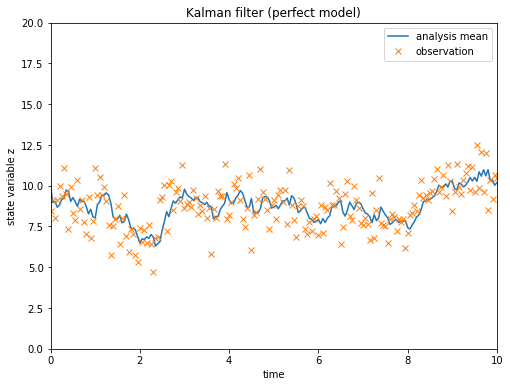

root mean square error = 0.5164
averaged continuously ranked probability score = 0.4120
ratio of y-refs above forecast mean = 0.5004
variance of analysis converges to 0.2666.


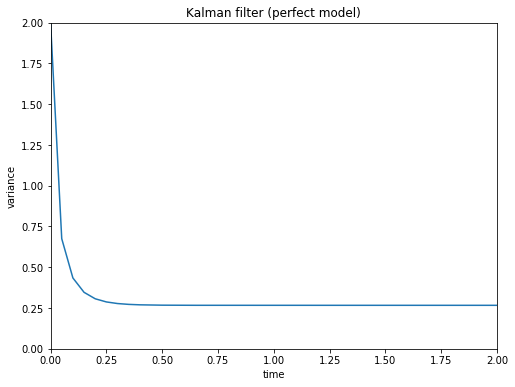

In [13]:
fig0a = plt.figure(figsize=(8,6))
plt.plot(timea[:1000],ma[:1000], '-', label="analysis mean")
plt.plot(timef[:1000],yobs[:1000], 'x', label="observation")
plt.xlabel("time")
plt.ylabel("state variable z")
plt.title("Kalman filter (perfect model)")
plt.xlim([0,10])
plt.ylim([0,20])
plt.legend()
plt.show()

RMSE = np.sqrt(np.mean((yref-ma[1:])**2))
MCRPS = np.mean(np.abs(yref-ma[1:]))

print("root mean square error = %.4f" %RMSE)
print("averaged continuously ranked probability score = %.4f" %MCRPS)

ind = np.where(yref > mf)
print("ratio of y-refs above forecast mean = %.4f" %(float(ind[0].shape[0])/STEPS))
print("variance of analysis converges to %.4f." %Pa[-1])

fig0b = plt.figure(figsize=(8,6))
plt.plot(timea[:1000],Pa[:1000])
plt.xlabel("time")
plt.ylabel("variance")
plt.xlim([0,2])
plt.ylim([0,2])
plt.title("Kalman filter (perfect model)")
plt.show()

### Example 6.4 (Imperfect model scenario)

In [14]:
d = -0.5

mf = np.zeros((STEPS))
timef = np.zeros((STEPS))
Pf = np.zeros((STEPS))

ma = np.zeros((STEPS+1))
timea = np.zeros((STEPS+1))
Pa = np.zeros((STEPS+1))

ma[0] = m0
Pa[0] = P0
timea[0] = 0.

for j in range(STEPS):
    m = ma[j]
    P = Pa[j]
    
    for i in range(Nout):
        # get updated mean and variance (eqn 6.7, 6.8)
        m = m + dt * d * m + dt * b
        P = (1. + dt * d)*P*(1. + dt * d) + 2.*dt*Q
    
    # old analysis = new forecast
    mf[j] = m
    Pf[j] = P
    
    # Kalman gain matrix
    K = P / (P+R)
    
    # Kalman filter equations to calculate analsyis at tn = tNobs
    Pa[j+1] = P - K*P
    ma[j+1] = m - K*(m-yobs[j])
    timea[j+1] = dtout * (j+1)
    timef[j] = dtout * j

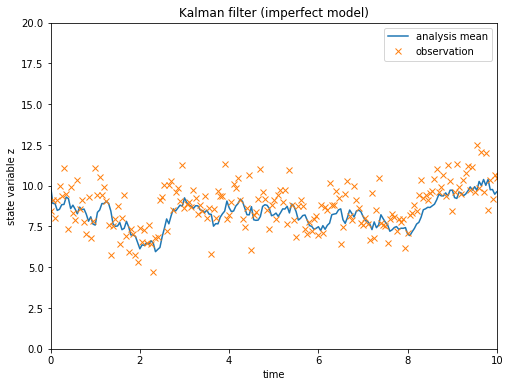

root mean square error = 0.7710
averaged continuously ranked probability score = 0.6361
ratio of y-refs above forecast mean = 0.8711
variance of analysis converges to 0.2530.


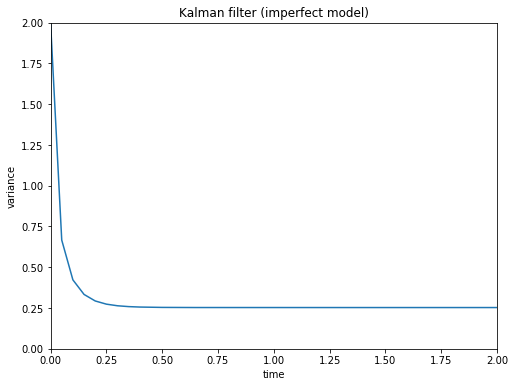

In [15]:
fig0c = plt.figure(figsize=(8,6))
plt.plot(timea[:1000],ma[:1000], '-', label="analysis mean")
plt.plot(timef[:1000],yobs[:1000], 'x', label="observation")
plt.xlabel("time")
plt.ylabel("state variable z")
plt.title("Kalman filter (imperfect model)")
plt.xlim([0,10])
plt.ylim([0,20])
plt.legend()
plt.show()

RMSE = np.sqrt(np.mean((yref-ma[1:])**2))
MCRPS = np.mean(np.abs(yref-ma[1:]))

print("root mean square error = %.4f" %RMSE)
print("averaged continuously ranked probability score = %.4f" %MCRPS)

ind = np.where(yref > mf)
print("ratio of y-refs above forecast mean = %.4f" %(float(ind[0].shape[0])/STEPS))
print("variance of analysis converges to %.4f." %Pa[-1])

fig0d = plt.figure(figsize=(8,6))
plt.plot(timea[:1000],Pa[:1000])
plt.xlabel("time")
plt.ylabel("variance")
plt.xlim([0,2])
plt.ylim([0,2])
plt.title("Kalman filter (imperfect model)")
plt.show()

### Example 6.7 (4DVar)

Taken from Chapter 1, Example 8. Lorenz model as a surrogate physical process

In [207]:
sigm = 10.
rho = 28.
beta = 8./3
dt = 0.001
Nout = 50
a = 1. / np.sqrt(dt)
fakt = 1.99999
N = 2 * 10**5

# initial conditions
x = -.587
y = -.563
z = 16.870
g1 = a * (1. / np.sqrt(2.) - .5)
g2 = a * (1. / np.sqrt(3.) - .5)
g3 = a * (1. / np.sqrt(5.) - .5)
res = np.zeros((N,7))

def gi(gi):
    if ((gi >= -a/2) and gi < 0):
        return a * (fakt * gi / a + 0.5)
    else:
        return a * (-fakt * gi / a + 0.5)
        
for i in range(N):
    res[i,:] = [i, x, y, z, g1, g2, g3]
    
    g1 = gi(g1)
    g2 = gi(g2)
    g3 = gi(g3)
    
    xn = x + dt * (sigm * (y - x)) + dt * g1
    yn = y + dt * (x * (rho - z) - y) + dt * g2
    zn = z + dt * (x * y - beta * z) + dt * g3
    
    x, y, z = xn, yn, zn
    
res[:,0] *= dt

# store only points with dt = 0.05
ressug = res[::Nout]

# add measurement error using tent map
meas = np.zeros((N*4,2))
a = 4.
fakt = 1.99999
eta1 = a * (2.**(-1./2) - 0.5)

for i in range(N*4):
    if ((eta1 >= -a/2) and (eta1 < 0)):
        eta1 = (fakt * eta1 + 0.5 * a)
    else:
        eta1 = (-fakt * eta1 + 0.5 * a)
    meas[i] = [i+1, eta1]
    
measerr = meas[:,1][::10]

# observation of x-component (dt = 0.05, first 200 datapoints)
obsx = np.zeros((N/Nout,3))
j = 0
i = 0

for k in range(0,N,Nout):
    err = 1./20 * np.sum(measerr[j:j+20])
    obsx[i] = [res[k,0], res[k,1], err]
    i += 1
    j += 20
    
obsx = np.array(obsx)
obs = [obsx[:,0], obsx[:,1] + obsx[:,2]]
obs = np.array(obs)

In [23]:
# Perform 4DVar
NA = 5
CYCLES = 40
alpha = 0.025

R = 1./15

x0 = -.587
y0 = -.563
z0 = 16.870

x_anal = np.zeros((CYCLES*NA+1))
y_anal = np.zeros((CYCLES*NA+1))
z_anal = np.zeros((CYCLES*NA+1))

rmseX = np.zeros((8))
rmseY = np.zeros((8))
rmseZ = np.zeros((8))
b = np.zeros((8))

for lkl in range(8):
    if lkl == 0:
        delta = 10000.
    elif lkl == 1:
        delta = 100.
    else:
        delta = 8.*1./2**(lkl-2.)
    
    KS = 1
    x_fg = np.copy(x0)
    y_fg = np.copy(y0)
    z_fg = np.copy(z0)
    
    for lll in range(CYCLES):
        x = np.zeros((NA+1))
        y = np.zeros((NA+1))
        z = np.zeros((NA+1))
        t = np.zeros((NA+1))
        
        xb = x_fg
        yb = y_fg
        zb = z_fg
        
        x[0] = np.copy(x_fg)
        y[0] = np.copy(y_fg)
        z[0] = np.copy(z_fg)
        t[0] = 0.
        
        vareps = 1.
        ll = 1
        W = []
        
        while vareps >= 1e-2:
            JAC = np.eye(3)
            H = np.array([1, 0, 0])
            dV = np.zeros((3,NA))
            r = np.zeros((NA))
            
            for j in range(NA):
                xh = x[j]
                yh = y[j]
                zh = z[j]
                
                for i in range(Nout):
                    xo = xh
                    yo = yh
                    zo = zh
                    
                    xh = xo + dt * 10. * (yo-xo)
                    yh = yo + dt * (xo * (28. - zo) - yo)
                    zh = zo + dt * (xo * yo - 8./3 * zo)
                    
                    # Get the Jacobian of the current iteration
                    DF = np.array([[-10., 10., 0.],[28. - zo, -1., -xo],[yo, xo, -8./3]])
                    
                    # Update step for the Jacobian
                    JAC = np.dot((np.eye(3) + dt * DF) , JAC)
                    
                x[j+1] = xh
                y[j+1] = yh
                z[j+1] = zh
                
                # Calculate residual: (forward map of reference - yobs)
                r[j] = xh - obs[1,j+KS]
                #print(r)
                # Gradient of the objective functional for each observation time-step
                dV[:,j] = np.dot(JAC.T,H.T*r[j])
                #print(dV)
                t[j+1] = dt * Nout * (j+1)
                
            # Objective functional
            W.append(.5 * np.sum(r**2) + .5 * ((x[0] - xb)**2 + (y[0] - yb)**2 + (z[0] - zb)**2) / delta)
            # Gradient of the objective functional over a data assimilation cycle
            dW = np.sum(dV, axis=1) + np.hstack((x[0] - xb, y[0] - yb, z[0] - zb)) / delta
            
            # Gradient descent method - want this to converge to < 1e-2.
            vareps = np.linalg.norm(dW)
            ll += 1 # Can remove this counter - unused.

            x[0] -= alpha * dW[0]
            y[0] -= alpha * dW[1]
            z[0] -= alpha * dW[2]
            
        x_anal[KS-1:KS+NA] = x
        y_anal[KS-1:KS+NA] = y
        z_anal[KS-1:KS+NA] = z

        x_fg = x[-1]
        y_fg = y[-1]
        z_fg = z[-1]

        KS = KS+NA

    print(lkl)
    
    rmseX[lkl] = np.sqrt(np.mean((ressug[:KS,1] - x_anal[:KS])**2))
    rmseY[lkl] = np.sqrt(np.mean((ressug[:KS,2] - y_anal[:KS])**2))
    rmseZ[lkl] = np.sqrt(np.mean((ressug[:KS,3] - z_anal[:KS])**2))
    b[lkl] = delta

0
1
2
3
4
5
6
7


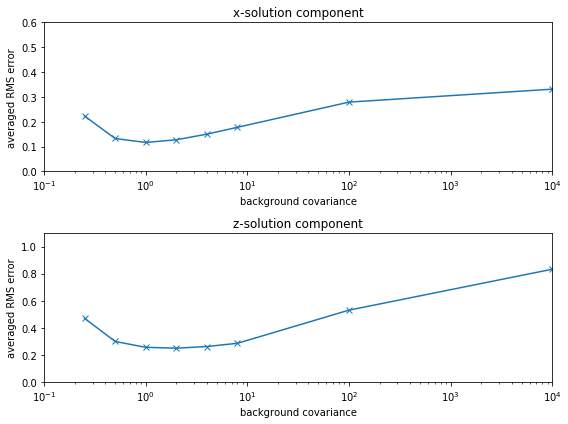

In [26]:
fig1 = plt.figure(figsize=(8,6))
ax = fig1.add_subplot(2, 1, 1)
ax.semilogx(b,rmseX,'-x')
ax.set_xlabel("background covariance")
ax.set_ylabel("averaged RMS error")
ax.set_title("x-solution component")
ax.set_xlim([0.1,10000])
ax.set_ylim([0.0,0.6])

ax = fig1.add_subplot(2, 1, 2)
ax.semilogx(b,rmseZ,'-x')
ax.set_xlabel("background covariance")
ax.set_ylabel("averaged RMS error")
ax.set_title("z-solution component")
ax.set_xlim([0.1,10000])
ax.set_ylim([0.0,1.1])
plt.tight_layout()
plt.show()

### Example 6.9 (Sequential importance sampling (SIS) filter)

First run the cell from Example 6.7 for the Lorenz model as a surrogate process.

In [199]:
STEPS = 40 # 40 windows of observations
R = 1./15

# recall that from example 4.8, the Lorenz model with drift term f(x) set to zero can be modelled 
# by a stochastic difference equation with mean = 0, var = 0.0838.
var = 0.0838
sigma = 0.1

m = np.zeros((5))
rmse_x = np.zeros((5))
rmse_y = np.zeros((5))
rmse_z = np.zeros((5))
effective = np.zeros((5,STEPS+1))

for lkl in range(5):
    if lkl == 0:
        m[lkl] = 10
    else:
        m[lkl] = 10**(lkl+1)
    
    # ensemble size
    M = m[lkl].astype(int)

    # initial PDF is Gaussian with var = 0.1, mean = (x0,y0,z0)
    x = x0 + np.sqrt(sigma) * np.random.randn(M)
    y = y0 + np.sqrt(sigma) * np.random.randn(M)
    z = z0 + np.sqrt(sigma) * np.random.randn(M)
    t = np.zeros((STEPS+1))
    
    weights = 1./M * np.ones((M))
    
    x_f = np.zeros((STEPS+1))
    y_f = np.zeros((STEPS+1))
    z_f = np.zeros((STEPS+1))
    
    x_f[0] = np.dot(weights.T,x)
    y_f[0] = np.dot(weights.T,y)
    z_f[0] = np.dot(weights.T,z)
    
    rmse_x[lkl] = 0.
    rmse_y[lkl] = 0.
    rmse_z[lkl] = 0.
    
    effective[lkl,0] = 1. / np.sum(weights**2)

    for j in range(STEPS):
        xh = x
        yh = y
        zh = z
        
        for i in range(Nout):
            xo = xh
            yo = yh
            zo = zh

            # step within each observation window by means of the stochastiv Lorenz-63 model
            xh = xo + dt * 10. * (yo-xo) + np.sqrt(dt * var) * np.random.randn(M)
            yh = yo + dt * (xo * (28. - zo) - yo) + np.sqrt(dt * var) * np.random.randn(M)
            zh = zo + dt * (xo * yo - 8./3 * zo) + np.sqrt(dt * var) * np.random.randn(M)

        # Calculate residual: (forward map of reference - yobs)
        r = xh - obs[1,j+1]
        # Update weights according to equation 6.29
        weights = np.exp(-r**2 / (R * 2.)) * weights
        weights /= np.sum(weights)

        x = xh
        y = yh
        z = zh
        
        x_f[j+1] = np.dot(weights.T,x)
        y_f[j+1] = np.dot(weights.T,y)
        z_f[j+1] = np.dot(weights.T,z)
        t[j+1] = dt * Nout * (j+1)
    
        rmse_x[lkl] = rmse_x[lkl] + (x_f[j+1] - ressug[j+1,1])**2
        rmse_y[lkl] = rmse_y[lkl] + (y_f[j+1] - ressug[j+1,2])**2
        rmse_z[lkl] = rmse_z[lkl] + (z_f[j+1] - ressug[j+1,3])**2

        effective[lkl,j+1] = 1./np.sum(weights**2)
        
    rmse_x[lkl] = np.sqrt(rmse_x[lkl] / STEPS)
    rmse_y[lkl] = np.sqrt(rmse_y[lkl] / STEPS)
    rmse_z[lkl] = np.sqrt(rmse_z[lkl] / STEPS)

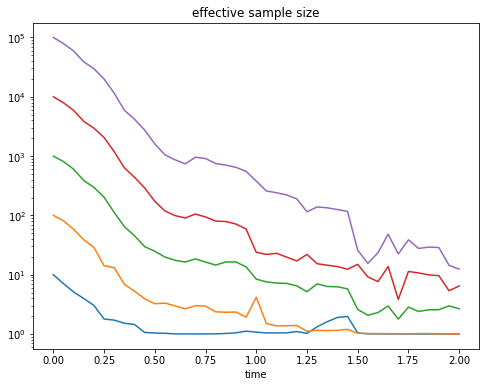

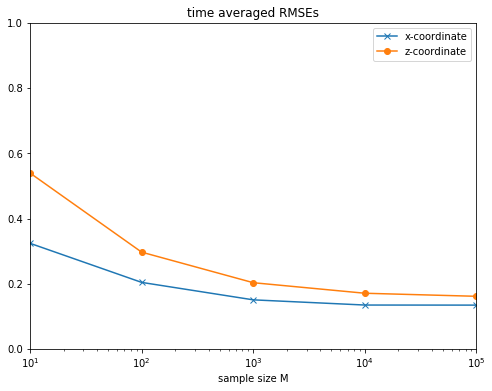

In [200]:
fig2a = plt.figure(figsize=(8,6))
plt.semilogy(t,effective.T)
plt.xlabel("time")
plt.title("effective sample size")
plt.show()

fig2b = plt.figure(figsize=(8,6))
plt.semilogx(m,rmse_x, '-x', label="x-coordinate")
plt.semilogx(m,rmse_z, '-o', label="z-coordinate")
plt.xlabel("sample size M")
plt.title("time averaged RMSEs")
plt.xlim([10,100000])
plt.ylim([0,1.0])
plt.legend()
plt.show()

### Example 6.11 (Sequential importance resampling (SIR) filter)

In [248]:
# define residual resampling function
def resampling(X,w,M,J):
    wm = M*w
    wi = np.floor(wm)
    nc = np.sum(wi).astype(int)

    A = np.zeros((J,nc))
    
    if (nc > 0):
        k = 0
        for i in range(M):
            for j in range(int(wi[i])):
                if j > 0:
                    k += 1
                    A[:,k] = X[:,i]
    else:
        A = np.zeros((J,0))
        
    wmd = wm - wi
    wmd /= np.sum(wmd)
    Nk = M - nc
    
    B = np.zeros((J,Nk))
    
    if (Nk > 0):
        exponent = 1./(np.arange(1,Nk+1)[::-1]).astype(float)
        u = np.cumprod(np.power(np.random.rand(Nk),exponent))
        u = u[::-1]

        wcu = np.cumsum(wmd)
        
        ind = np.zeros((Nk)).astype(int)
        kk = 0
        
        for ll in range(Nk):
            while (wcu[kk] < u[ll]):
                kk += 1
                
            ind[ll] = kk
        B = X[:,ind]
        
    else:
        B = np.zeros((J,0))

    return A, B

In [284]:
STEPS = 5*40 # 40 windows of observations
R = 1./15

# recall that from example 4.8, the Lorenz model with drift term f(x) set to zero can be modelled 
# by a stochastic difference equation with mean = 0, var = 0.0838.
var = 0.0838
sigma = 0.1

NN = 6
m = np.zeros((NN))
rmse_x = np.zeros((NN))
rmse_y = np.zeros((NN))
rmse_z = np.zeros((NN))
effective = np.zeros((NN,STEPS+1))

m = np.arange(50,300+50,50)

for lkl in range(NN):
#     m[lkl] = (lkl + 1) * 50.
    
    # ensemble size
    M = m[lkl]
    
    x0 = -.587
    y0 = -.563
    z0 = 16.870
    
    # initial PDF is Gaussian with var = 0.1, mean = (x0,y0,z0)
    x = x0 + np.sqrt(sigma) * np.random.randn(M)
    y = y0 + np.sqrt(sigma) * np.random.randn(M)
    z = z0 + np.sqrt(sigma) * np.random.randn(M)
    t = np.zeros((STEPS+1))
    
    weights = 1./M * np.ones((M))
    
    x_f = np.zeros((STEPS+1))
    y_f = np.zeros((STEPS+1))
    z_f = np.zeros((STEPS+1))
    
    x_f[0] = np.dot(weights.T,x)
    y_f[0] = np.dot(weights.T,y)
    z_f[0] = np.dot(weights.T,z)

    rmse_x[lkl] = 0.
    rmse_y[lkl] = 0.
    rmse_z[lkl] = 0.
    
    effective[lkl,0] = 1. / np.sum(weights**2)

    for j in range(STEPS):
        xh = x
        yh = y
        zh = z
        
        for i in range(Nout):
            xo = xh
            yo = yh
            zo = zh

            # step within each observation window by means of the stochastiv Lorenz-63 model
            xh = xo + dt * 10. * (yo - xo) + np.sqrt(dt * var) * np.random.randn(M)
            yh = yo + dt * (xo * (28. - zo) - yo) + np.sqrt(dt * var) * np.random.randn(M)
            zh = zo + dt * (xo * yo - 8./3 * zo) + np.sqrt(dt * var) * np.random.randn(M)

        # Calculate residual: (forward map of reference - yobs)
        r = xh - obs[1,j+1]
        
        # Update weights according to equation 6.29
        weights = np.exp(-r**2 / (R * 2.)) * weights
        weights /= np.sum(weights)
        print(weights)
        x = xh
        y = yh
        z = zh
        
        x_f[j+1] = np.dot(weights,x)
        y_f[j+1] = np.dot(weights,y)
        z_f[j+1] = np.dot(weights,z)
        t[j+1] = dt * Nout * (j+1)
    
        rmse_x[lkl] = rmse_x[lkl] + (x_f[j+1] - ressug[j+1,1])**2
        rmse_y[lkl] = rmse_y[lkl] + (y_f[j+1] - ressug[j+1,2])**2
        rmse_z[lkl] = rmse_z[lkl] + (z_f[j+1] - ressug[j+1,3])**2

        effective[lkl,j+1] = 1. / np.sum(weights**2)
        print("effective", effective[lkl,j+1])
        # introduce a resampling step (residual resampling)
        if (effective[lkl,j+1] < M/2.):
            X = np.vstack((x,y,z))
            print(X.shape)
            A, B = resampling(X,weights,M,3)
            
            # reinitialise weights to be equal
            weights = 1./M * np.ones(M)

            x = np.hstack((A[0,:],B[0,:])).T
            y = np.hstack((A[1,:],B[1,:])).T
            z = np.hstack((A[2,:],B[2,:])).T
        
    rmse_x[lkl] = np.sqrt(rmse_x[lkl] / STEPS)
    rmse_y[lkl] = np.sqrt(rmse_y[lkl] / STEPS)
    rmse_z[lkl] = np.sqrt(rmse_z[lkl] / STEPS)


[3.74534236e-03 9.64624103e-03 9.32759458e-03 1.03439904e-03
 2.93926248e-02 3.19241126e-02 2.68857009e-02 2.90678603e-02
 1.89661993e-02 2.15254165e-02 1.30203091e-02 2.00772490e-03
 3.34637226e-02 3.49439143e-02 3.48040799e-02 3.87965297e-03
 2.89666825e-03 6.42539903e-03 3.53534512e-06 3.46103415e-02
 2.50529660e-02 1.45034733e-02 9.70409345e-03 3.47925660e-02
 3.46905397e-02 3.37741758e-02 1.00143839e-02 3.46320294e-02
 2.76134157e-02 1.83656596e-02 3.30679030e-02 3.45855128e-02
 3.49420852e-02 9.95654387e-03 2.53725893e-02 5.47981179e-05
 3.36583607e-02 3.25467081e-02 1.16816471e-02 3.47840986e-02
 7.09122448e-03 3.37331961e-02 2.66904701e-02 1.01638368e-02
 2.16791603e-02 4.00979153e-03 1.10873707e-02 2.36329142e-02
 8.93946526e-04 1.96537005e-02]
('effective', 36.10854003291047)
[5.86774004e-04 4.49793857e-03 1.35777369e-03 2.73870741e-05
 2.11596797e-02 4.63914121e-02 2.69973021e-02 4.21388777e-02
 4.11602329e-03 7.41231840e-03 2.04728318e-03 1.11851260e-04
 3.93347054e-02 5.08

[1.41118095e-14 9.12273097e-03 1.30259099e-02 9.89739398e-03
 1.44063660e-02 1.21008797e-02 1.09234642e-02 9.84366500e-03
 1.32959371e-02 1.56783647e-02 2.27135853e-02 2.09114095e-02
 4.45739569e-02 4.28998610e-02 1.66222773e-02 3.49346895e-02
 1.90806946e-02 1.86700380e-02 6.76319285e-03 6.12903832e-03
 7.35493727e-03 9.29995194e-03 1.04320674e-02 7.51212199e-03
 1.18684296e-15 7.22987532e-16 2.55140268e-15 3.08453669e-17
 4.18214535e-15 1.81933839e-17 6.22996902e-16 1.11784413e-14
 6.10962478e-16 9.82053880e-17 2.32699021e-17 5.82598569e-16
 6.66316744e-18 1.00010985e-15 5.14780206e-02 2.19691946e-02
 7.16750121e-02 6.63753734e-02 7.04180711e-02 7.04690873e-02
 3.53267451e-02 1.63973408e-02 7.08045232e-02 7.10902525e-02
 6.95056644e-02 8.29818166e-03]
('effective', 20.917578775854015)
(3, 50)
[1.52725545e-14 6.93103300e-03 2.22506835e-02 8.16536027e-03
 6.83334268e-04 4.53843691e-04 1.76614037e-03 4.75179751e-03
 1.49040291e-03 1.98745037e-03 2.08490998e-04 3.46172129e-04
 9.76462255

[7.26778998e-58 2.03666052e-04 1.69570857e-03 2.34226160e-03
 1.88673353e-03 1.36420023e-03 5.81707996e-04 1.44301144e-04
 1.27731395e-04 3.21837312e-03 3.03874860e-03 5.09047272e-03
 9.43188249e-04 6.46823968e-05 8.42922926e-04 1.99889904e-04
 1.76355950e-04 1.17643394e-03 1.26445713e-03 2.51837966e-03
 2.85092999e-02 2.95794289e-02 2.78499003e-02 2.81636778e-02
 2.68126306e-02 2.21690298e-02 2.87474045e-02 3.14204310e-02
 2.98184608e-02 2.13438960e-02 2.01416391e-02 2.79333743e-02
 2.96147462e-02 1.79014521e-02 2.19139034e-02 3.01457626e-02
 2.38691855e-02 2.27982264e-02 2.37608021e-02 3.10429210e-02
 2.91736062e-02 2.94205627e-02 3.58347323e-04 2.83490936e-04
 1.66979868e-02 1.05731079e-02 2.09112265e-02 1.39452938e-02
 1.40639212e-02 1.85408428e-02 1.19990434e-03 2.56682304e-03
 3.86583815e-03 3.31313050e-59 4.92245625e-59 1.53135050e-59
 2.86012156e-59 4.17605548e-58 2.64682257e-56 1.13071315e-56
 9.93129925e-58 2.30665442e-58 1.05180792e-58 1.12482466e-57
 5.62494245e-60 4.920226

[4.38073504e-220 2.74864645e-002 2.27560498e-002 1.20897401e-002
 2.41145340e-002 1.49574290e-002 2.39255656e-002 2.36673179e-002
 1.92807985e-002 1.78675109e-002 2.31890114e-002 2.31864481e-002
 2.39554604e-002 2.08502224e-002 2.34394899e-002 2.01457318e-002
 2.24674609e-002 1.93835162e-002 1.28166498e-002 1.25618502e-002
 2.18572757e-002 2.37510112e-002 1.04774281e-002 1.49701735e-002
 2.27292926e-002 2.81840078e-002 2.32016058e-002 1.93133436e-002
 1.65832099e-002 1.53874616e-002 2.05118000e-002 7.09574703e-219
 5.25536695e-215 6.61662776e-215 1.54919598e-207 2.61695083e-214
 9.95650090e-212 1.62410905e-207 1.22684687e-215 4.49609552e-212
 1.55374192e-214 3.33909691e-207 8.17079220e-202 2.15242505e-219
 2.39182953e-214 8.68010363e-210 1.55097784e-201 6.97337012e-203
 2.76250815e-215 4.33897924e-214 2.45616727e-214 1.11992283e-212
 1.25816130e-210 1.37965290e-211 1.11248729e-200 2.94452467e-207
 8.18071989e-214 3.21754810e-212 1.60657994e-206 3.24151281e-219
 2.07600412e-211 2.904533

[1.79466143e-61 1.56740288e-02 1.91083600e-02 8.81063208e-03
 1.06309886e-02 6.58271928e-03 5.23524316e-03 8.72012076e-03
 2.49888321e-02 6.86697109e-03 7.12582082e-03 2.10418440e-03
 8.82426716e-03 1.45284949e-02 1.08084115e-02 3.46383661e-02
 1.65513217e-02 1.57527348e-02 5.05607791e-03 1.03526054e-02
 1.03895138e-02 7.85069453e-03 1.07792488e-02 1.28692330e-02
 1.03036722e-02 1.25388137e-02 6.77746991e-03 4.31757704e-03
 3.08190933e-03 2.01345815e-03 3.95363341e-03 1.30678668e-02
 5.00931047e-03 1.51085985e-02 1.10486911e-02 6.53141863e-03
 2.83595658e-03 1.64147785e-02 1.67088533e-02 9.33110027e-03
 1.51501392e-02 3.94650725e-03 1.44055201e-02 1.19284537e-55
 2.64291121e-63 3.65128765e-59 1.32183050e-59 2.98917518e-61
 1.27052475e-58 6.55329855e-61 1.03245026e-61 3.75025341e-62
 2.43326546e-59 3.42438201e-59 3.31857280e-57 6.09710970e-57
 1.94426290e-57 1.35238022e-56 1.79203330e-60 5.60783186e-59
 2.64420755e-57 2.90288751e-55 2.40728328e-59 6.25591507e-60
 5.67912951e-54 8.259950

(3, 150)
[0.00000000e+00 1.70849609e-02 1.14995265e-02 3.75571081e-03
 1.18230100e-02 9.09242488e-03 4.74794642e-03 1.88824728e-03
 1.93637324e-02 4.04189376e-02 2.96677602e-02 3.38156455e-02
 2.73142511e-02 1.92191477e-02 2.00572167e-02 2.88549540e-03
 7.13628544e-03 3.66890933e-03 5.59973090e-03 2.64469045e-03
 6.67784219e-03 1.16516793e-02 1.48609355e-02 1.54033746e-02
 8.89595852e-03 1.47398626e-02 4.29374036e-03 1.33974163e-02
 1.18201456e-03 1.51043508e-03 4.77390977e-03 5.26907803e-03
 9.52189308e-03 4.27929600e-03 8.03939526e-03 6.56556199e-04
 1.61318683e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00

[0.         0.00779075 0.00962565 0.01498025 0.01011342 0.0073726
 0.00996571 0.00710745 0.01294183 0.01157203 0.00913931 0.01006746
 0.01407253 0.01181544 0.01338796 0.01071704 0.00540114 0.01385608
 0.01555181 0.01579769 0.00980673 0.00909486 0.01125624 0.00295928
 0.00265109 0.00510902 0.00289242 0.01087769 0.00666879 0.01293058
 0.00838649 0.00703313 0.01411631 0.01509538 0.00830934 0.01645193
 0.01545551 0.00968615 0.01526775 0.00276533 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.      

[7.48941462e-07 1.17829766e-02 1.51098804e-02 1.77891414e-02
 1.06689384e-02 2.01458380e-02 1.92821931e-02 1.99517941e-02
 1.77122014e-02 3.82670742e-03 1.06448477e-02 1.58834129e-02
 1.57254583e-02 1.54542314e-02 1.85453449e-02 1.51798426e-02
 1.61849575e-02 1.94306838e-02 9.02239657e-03 1.77456745e-02
 1.38500719e-02 8.18036950e-20 2.68918968e-03 6.32063509e-03
 9.53893336e-03 1.07370589e-02 1.94563736e-02 1.79828979e-02
 7.71274829e-03 1.73739616e-02 1.48419740e-02 1.91589129e-02
 1.85338278e-07 1.25639076e-08 1.97689200e-02 1.69542445e-02
 1.85391394e-02 1.04860719e-02 1.75080142e-02 1.83784950e-02
 6.28066695e-03 1.35737697e-02 1.71105761e-02 2.00066363e-02
 1.81860717e-02 1.52609627e-17 6.05309449e-18 7.04134414e-17
 2.27052372e-15 3.65059951e-23 7.37583731e-17 6.18900807e-21
 7.72018669e-20 2.46654290e-03 9.63054779e-04 1.77366101e-03
 7.29357514e-04 3.96929968e-03 5.83930084e-03 6.30663322e-03
 2.87680093e-03 7.51340654e-03 7.93197426e-03 4.78556977e-03
 7.12089154e-03 1.076504

[0.         0.01222554 0.01171674 0.01249827 0.0124299  0.01256153
 0.01179783 0.01197489 0.01105621 0.01189573 0.01238283 0.01169253
 0.01168249 0.01258771 0.0124411  0.0109734  0.0111585  0.01190523
 0.01251447 0.01263455 0.01054892 0.01177378 0.01135657 0.01232008
 0.01147007 0.012512   0.0126429  0.01235999 0.01194838 0.01262854
 0.01143535 0.01186852 0.01026209 0.01117696 0.01148189 0.01230899
 0.01214654 0.01134223 0.01258686 0.01257827 0.01195511 0.01263507
 0.01232148 0.01132655 0.01150306 0.01061328 0.01215265 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.


[1.64910431e-12 1.33532509e-02 9.48897838e-03 2.07155841e-02
 1.27984260e-03 2.97084297e-04 8.51613544e-04 1.72280951e-02
 8.07208595e-03 2.29569316e-03 2.12799520e-03 3.07078205e-03
 1.67218405e-03 1.03615950e-02 8.13662989e-03 1.60069347e-02
 1.11032549e-03 2.08049118e-02 1.26632922e-02 1.02155662e-02
 7.67133372e-04 4.81991578e-03 1.68366666e-02 8.50213500e-03
 1.99560166e-02 2.11273709e-02 1.01312341e-02 1.31612814e-02
 7.14255116e-03 4.83776053e-03 1.75231109e-02 5.48779492e-03
 1.19703374e-02 1.56874722e-02 1.64239395e-02 1.29987513e-02
 6.96010336e-03 1.27913947e-02 1.29005935e-02 1.51253473e-02
 3.54901635e-03 3.11098216e-03 3.51417739e-03 1.71091976e-04
 4.35364837e-03 1.19761123e-02 2.40593900e-03 7.57660768e-04
 2.14064172e-02 1.22613772e-03 5.25847986e-04 7.81304715e-05
 1.37193799e-03 3.77652096e-03 7.25771368e-03 2.30910688e-04
 2.61779115e-03 1.24808147e-06 1.91984416e-03 3.08777295e-03
 6.07167973e-03 2.92103400e-03 4.69096465e-03 3.32657873e-03
 4.67696401e-03 6.227521

[4.68569814e-238 1.02938014e-002 9.27158229e-003 8.39356528e-003
 6.80249602e-003 4.35436556e-003 5.63424580e-003 9.49460234e-003
 1.72550519e-003 5.15879642e-003 9.84961865e-003 4.19241651e-003
 8.45686067e-003 6.48445920e-003 9.18305145e-003 5.37974060e-003
 1.53522003e-002 9.25597487e-003 9.83661140e-003 1.02796502e-002
 1.34705576e-002 1.10985566e-002 1.02420066e-002 7.35929290e-003
 1.81678938e-002 1.39210922e-002 1.01342699e-002 8.31325384e-003
 1.10855974e-002 8.91418949e-003 7.26126172e-003 1.07766490e-002
 4.97417795e-003 6.25961355e-003 8.15209276e-003 5.42404371e-003
 1.46134587e-003 2.42146122e-003 4.32395676e-004 1.90805099e-003
 2.92603453e-003 7.10048282e-003 4.26040063e-003 9.14688855e-003
 8.78691566e-003 1.41891382e-002 1.03712228e-002 6.13090700e-003
 6.51204234e-003 1.39799137e-002 1.30447520e-002 1.79169960e-002
 1.78289476e-002 7.28721078e-003 1.56471722e-002 1.17676109e-002
 9.93820935e-003 2.40266938e-003 4.62625219e-003 9.53570283e-003
 1.07010188e-002 1.162739

[0.00000000e+00 7.51445009e-03 9.19365483e-03 1.57420054e-03
 4.79281590e-03 1.91022994e-03 2.74968931e-03 4.40099459e-03
 4.53416879e-03 2.22476428e-03 1.44940022e-03 8.77691105e-04
 1.11941959e-03 2.24098078e-03 1.54034348e-03 1.90309531e-03
 1.77301452e-03 4.70517710e-03 2.78798817e-03 2.29979969e-03
 3.45866625e-03 1.25249888e-02 5.13176799e-03 8.14619822e-03
 3.78094371e-03 1.37060827e-02 9.10315115e-03 1.37405532e-02
 1.21911305e-02 3.10956551e-03 2.08142095e-03 3.99916109e-03
 2.98302062e-03 2.57411219e-03 4.43573807e-03 2.43496415e-03
 8.29107495e-03 1.19092829e-02 1.21352410e-02 8.48234890e-03
 1.42556125e-02 7.53730523e-03 1.58853890e-02 1.17594512e-02
 1.23048647e-02 1.37325419e-02 1.25429478e-02 9.21038524e-03
 1.11101347e-02 9.55704233e-03 1.72956127e-02 1.18077746e-02
 1.42898245e-02 1.07601245e-02 9.24648050e-03 1.16225326e-02
 1.26724994e-02 7.85902355e-03 1.21088934e-02 1.16527931e-02
 9.04645193e-03 1.48462736e-02 1.06085649e-02 1.06908075e-02
 4.94579234e-03 5.512220

[0.         0.00662778 0.00815003 0.00137047 0.00296846 0.00410729
 0.01938234 0.00943539 0.0038852  0.00136644 0.00146086 0.00320832
 0.00082859 0.00209471 0.00196836 0.00821606 0.00352953 0.0084461
 0.00784044 0.01126211 0.01093388 0.0109857  0.00105137 0.00422887
 0.00139162 0.01231258 0.00887157 0.00489612 0.00514105 0.00296525
 0.01246089 0.01493272 0.00346681 0.00313266 0.00272793 0.00145935
 0.00487656 0.00421227 0.01303139 0.01699956 0.01459796 0.01495282
 0.01601681 0.02085021 0.01831237 0.00612663 0.00347065 0.00271997
 0.01801025 0.00965299 0.00405669 0.00906169 0.00211392 0.00303795
 0.01096716 0.00248966 0.00231646 0.00259526 0.0052146  0.00875698
 0.00557893 0.0045612  0.0116178  0.00437778 0.00368197 0.00646207
 0.02059398 0.00356348 0.00219193 0.00201106 0.00266518 0.00475133
 0.00426209 0.00495751 0.00111788 0.00125899 0.01768227 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.      

[1.71819071e-05 6.40424788e-03 5.77429445e-03 4.29426255e-03
 6.53686088e-03 2.88410536e-03 4.63988007e-03 7.64568456e-03
 6.84242213e-03 6.83673516e-03 7.68989495e-03 7.71129959e-03
 7.63021482e-03 6.31951081e-03 5.40109218e-03 6.19752498e-03
 7.01239941e-03 6.14589250e-03 4.72397752e-03 6.76933254e-03
 6.44992806e-03 7.63813970e-03 7.48016778e-03 7.16092579e-03
 7.48543155e-03 7.64692780e-03 7.58491469e-03 7.61631975e-03
 7.54001414e-03 7.70073541e-03 7.50655364e-03 6.38644973e-03
 7.48777751e-03 7.62502507e-03 6.38796788e-03 6.54932182e-03
 5.10063160e-03 6.35328869e-03 6.55793329e-03 6.02064183e-03
 4.81356934e-03 5.70054599e-03 7.17236083e-03 6.73227659e-03
 6.64318309e-03 5.59845412e-03 6.28233037e-03 7.13646739e-03
 6.50322311e-03 4.57633275e-03 7.47591506e-03 6.39973355e-03
 6.29488959e-03 7.71162442e-03 7.64213271e-03 7.22436135e-03
 7.32890790e-03 3.78299106e-03 5.22064712e-03 6.50385815e-03
 7.08362194e-03 6.40715068e-03 6.39834888e-03 7.19640184e-03
 7.37013713e-03 6.793964

[1.73948199e-33 7.68725814e-03 6.25076064e-03 4.83230746e-03
 6.39258871e-03 8.15368392e-03 7.99228263e-03 7.52825918e-03
 7.71321662e-03 8.05569217e-03 8.13498529e-03 5.35968754e-03
 7.28394325e-03 7.21296270e-03 7.81581431e-03 7.81124610e-03
 7.65534417e-03 7.60835256e-03 8.03109136e-03 7.70462274e-03
 7.86145310e-03 7.06471669e-03 7.73794781e-03 6.48573860e-03
 8.13298238e-03 8.03984837e-03 8.15759413e-03 7.60562225e-03
 8.07876433e-03 7.48990184e-03 7.57231200e-03 8.14229325e-03
 7.85750012e-03 7.74543226e-03 6.78407863e-03 7.07496648e-03
 8.12909749e-03 6.95116065e-03 7.25963149e-03 8.11330715e-03
 8.14892584e-03 7.58839296e-03 8.14803493e-03 8.10433400e-03
 8.06451498e-03 8.11813123e-03 8.13754200e-03 8.06225869e-03
 6.99078807e-03 6.19473379e-03 7.49868296e-03 7.74894380e-03
 8.12088560e-03 8.12825345e-03 6.13885958e-03 8.13404955e-03
 7.56535364e-03 6.53900393e-03 7.30650509e-03 7.99147412e-03
 6.20446297e-03 5.63778547e-03 5.27216686e-03 8.12347135e-03
 5.47483169e-03 7.600208

[0.00000000e+00 4.30622439e-03 9.33244631e-04 1.50868402e-03
 1.76718665e-03 2.56727850e-03 1.06784126e-02 5.75065137e-03
 6.85636681e-03 5.73579113e-03 4.06527879e-03 3.72616143e-03
 1.27379595e-02 6.99100470e-03 1.09180982e-02 2.88220083e-03
 1.64805402e-02 1.32263044e-02 7.30926856e-03 3.64927354e-03
 5.32659248e-03 1.04476684e-02 7.06581070e-03 5.55059745e-03
 3.42971211e-03 1.69498626e-03 1.96595441e-03 7.87634742e-03
 4.14659743e-03 2.42551663e-03 1.14897790e-03 6.43944701e-04
 1.39642900e-02 1.92558853e-03 1.57374066e-03 2.46940884e-03
 2.17999600e-03 1.81434876e-03 8.46625780e-04 1.04598539e-03
 1.03665063e-03 6.24482482e-03 3.80581318e-03 6.57536076e-03
 1.50171404e-03 8.96265938e-04 1.29318586e-02 3.61352751e-03
 2.64797116e-03 1.72578032e-03 2.08138552e-03 3.54611271e-03
 5.67902033e-03 5.65126812e-03 2.03703235e-03 2.01088909e-03
 4.00127818e-03 1.14654526e-03 6.18117770e-03 2.11088220e-03
 3.72437435e-03 6.72080521e-03 9.25778415e-03 2.09205592e-03
 2.05083772e-02 1.324636

[0.00000000e+00 9.39436877e-03 3.51375399e-03 5.27354412e-03
 1.14093201e-02 1.03523224e-02 1.12039414e-02 8.12422654e-03
 2.95124967e-03 8.83750518e-03 1.11865821e-02 7.32328547e-03
 1.37398858e-02 1.35113325e-02 1.34588557e-02 1.25241860e-02
 1.18932759e-02 1.24999216e-02 7.86132415e-03 1.10057082e-02
 9.23179445e-03 8.91063287e-03 3.01071941e-03 1.76007442e-03
 6.73038561e-03 2.84831650e-03 4.31028358e-03 7.14574105e-03
 5.61788734e-03 4.60292223e-03 4.97870021e-03 1.12842265e-02
 8.77316143e-03 7.71230868e-03 3.53518161e-03 2.18699966e-03
 1.10604872e-02 8.78273938e-03 5.31968339e-03 1.31429609e-02
 8.86507371e-03 8.81506969e-03 4.46717018e-03 7.92805684e-03
 4.83059850e-03 7.61529393e-03 1.18350258e-02 6.31123140e-03
 3.68625092e-03 5.55491207e-03 1.05220964e-02 1.22073284e-02
 1.09022502e-02 1.07180333e-02 1.04941841e-02 8.95878012e-03
 9.70582239e-03 1.21520712e-02 6.34211322e-03 5.08176378e-03
 5.47670383e-03 8.73538748e-03 1.08267860e-03 0.00000000e+00
 0.00000000e+00 0.000000

(3, 300)
[1.71514112e-10 6.51855937e-03 2.37854426e-03 1.89768373e-03
 1.94193259e-03 2.44517304e-03 9.71709143e-04 1.52834270e-03
 2.88766159e-03 2.19898073e-03 3.57682214e-03 2.57034482e-03
 5.21293543e-03 3.47238579e-03 5.10457825e-03 4.39388087e-03
 7.74000594e-03 3.58594004e-03 3.84277033e-03 4.86324995e-03
 5.56689487e-03 6.76355595e-03 2.77078804e-03 2.79652356e-03
 5.64357804e-03 8.67454635e-03 4.25548625e-03 2.71109730e-03
 2.89886645e-03 5.92564040e-03 6.66630356e-03 8.89657979e-03
 8.06444246e-03 6.28887080e-03 6.85200814e-03 5.08302221e-03
 8.82145302e-03 6.95837486e-03 7.11307768e-03 5.31696843e-03
 4.99865252e-03 7.58757753e-03 6.54836392e-03 5.28356513e-03
 3.16212286e-03 4.58271999e-03 4.48849282e-03 6.93299920e-03
 4.48182464e-03 6.50146183e-03 7.35489480e-03 4.65952927e-03
 8.07159866e-03 7.05144016e-03 4.51524800e-03 5.47801613e-03
 1.36435438e-03 2.43903865e-03 4.31125843e-03 5.32864770e-03
 3.30830858e-03 4.05099315e-03 3.28710894e-03 2.77360419e-03
 5.06549821e-03

[1.48993931e-03 9.62306100e-04 1.56960645e-03 9.66473279e-04
 4.28262800e-03 1.30699443e-03 7.15096020e-04 2.43075069e-03
 2.82217127e-03 3.98913377e-03 4.18060507e-03 6.19108021e-04
 3.13907785e-03 6.08762943e-03 6.41909733e-03 2.32604054e-03
 8.81262789e-04 5.56366681e-03 4.88675402e-03 3.13587918e-03
 6.54842457e-03 7.54817137e-03 9.48501632e-04 2.71458584e-03
 3.43161012e-03 3.80025637e-03 3.26734920e-03 1.07035133e-02
 8.07956379e-03 8.19285908e-03 9.60930678e-03 4.59941453e-03
 5.31306126e-03 7.35406928e-03 9.64044991e-03 8.49215236e-03
 1.12110693e-02 1.17501299e-02 8.03294578e-03 3.43876092e-03
 2.39459029e-03 4.03580697e-03 4.89323310e-03 3.10967559e-03
 1.78986548e-03 8.42681835e-03 8.44747475e-03 6.72988062e-04
 2.57945686e-03 5.12360254e-03 2.44274101e-03 5.26660169e-03
 1.25344127e-03 1.21295350e-02 1.15427207e-02 1.21133582e-02
 8.05105573e-03 5.88601274e-03 6.73922639e-03 4.37002094e-03
 4.85978772e-03 8.25005800e-03 6.15198563e-03 2.55215680e-03
 3.26807136e-03 2.258669

[8.68709795e-110 6.19959804e-003 1.12806168e-002 1.96297985e-002
 1.54498567e-002 8.27446350e-003 5.02708341e-003 1.18654164e-002
 1.23128830e-002 2.12217362e-002 2.52307873e-002 1.65522528e-002
 2.06411469e-002 1.79526006e-002 2.02500079e-002 1.28345029e-002
 2.44750061e-003 1.67382626e-003 4.03009702e-004 1.59600806e-003
 1.32922075e-002 1.77734976e-003 9.53968477e-003 3.68463629e-004
 4.15629994e-003 8.91501794e-004 4.56304910e-003 5.73962284e-003
 2.87665327e-003 1.71155272e-003 1.72502191e-003 2.60443261e-003
 7.52870749e-003 2.24238532e-003 1.32975708e-003 3.92808432e-004
 1.66800015e-003 3.48496638e-003 8.52184300e-003 8.90882060e-003
 1.23055186e-002 1.35220714e-002 7.82611657e-003 5.91574198e-003
 1.10027010e-003 4.36260799e-003 7.54211808e-003 8.81077491e-003
 1.23480994e-002 4.42494116e-003 1.83466604e-002 1.79251422e-002
 4.66081523e-003 3.44159874e-003 7.01945154e-003 7.00233226e-003
 1.60059909e-002 6.31563298e-003 8.59662705e-003 2.20539345e-002
 9.72467072e-003 1.011404

[4.11597022e-70 7.02741631e-03 7.66154764e-03 7.44213743e-03
 7.59266335e-03 7.48239698e-03 7.59040245e-03 7.43476363e-03
 6.99746389e-03 7.08050828e-03 6.80913235e-03 7.63878296e-03
 7.55976901e-03 5.56815777e-03 6.46457565e-03 3.56283780e-03
 6.80760942e-03 6.37938656e-03 7.51544055e-03 7.58076873e-03
 6.73216313e-03 6.93780696e-03 6.59437259e-03 7.52689656e-03
 6.93984559e-03 7.65297669e-03 6.50243487e-03 5.14570353e-03
 7.31032518e-03 6.43866509e-03 7.00199276e-03 5.53472568e-03
 5.15125378e-03 5.38712610e-03 6.29077963e-03 7.64477306e-03
 5.43001385e-03 6.03897045e-03 5.08017378e-03 7.63049508e-03
 6.45175530e-03 5.92484574e-03 6.18611891e-03 5.02450200e-03
 4.83081969e-03 3.27588798e-03 7.10779014e-03 7.60557005e-03
 6.91245590e-03 3.34628028e-03 7.51656163e-03 7.66118772e-03
 7.63882128e-03 7.40588198e-03 3.40254073e-03 7.66175575e-03
 7.48763383e-03 7.12052226e-03 6.05357736e-03 5.55784615e-03
 5.99973186e-03 4.61185126e-03 7.63097139e-03 6.17109735e-03
 6.58153104e-03 4.156639

[0.00000000e+00 1.23589659e-02 3.69318778e-03 6.80664507e-03
 6.17456336e-03 6.11684364e-03 5.53407019e-03 3.08427962e-03
 3.19037513e-03 6.52633704e-03 1.13131809e-02 7.10475075e-03
 3.22411629e-03 3.87057545e-03 8.99675050e-03 9.78820648e-04
 6.30206608e-03 6.13636670e-03 3.83303174e-03 7.77379708e-03
 6.16561717e-03 4.81691399e-03 7.90922740e-03 4.36370024e-03
 3.92264420e-03 4.45156168e-04 6.09828444e-03 4.57664678e-03
 5.98291474e-03 6.87610339e-03 7.97040164e-03 7.73720391e-03
 1.02163214e-02 3.87185278e-03 2.48789499e-03 1.91178109e-03
 7.56056383e-03 2.83883457e-03 3.61638396e-03 1.77765952e-04
 1.41861710e-03 1.10498021e-02 2.71876058e-03 4.58327901e-03
 7.66507784e-03 6.12808121e-03 2.18068806e-03 1.86085102e-03
 1.80527316e-03 1.06129075e-02 6.70478776e-03 6.56993773e-03
 2.36703665e-03 6.35610680e-03 2.30826282e-05 3.22425654e-04
 1.42315424e-03 3.76453745e-04 4.11816221e-04 3.18014553e-04
 1.23760175e-03 7.18191185e-03 5.86699878e-03 6.63024055e-03
 6.76294103e-03 2.253141

[1.24735842e-259 6.66087979e-003 5.91039357e-003 5.66543072e-003
 5.82569627e-003 6.49138419e-003 3.61688800e-003 6.40012765e-003
 6.33934194e-003 6.65440392e-003 5.99938728e-003 5.70598464e-003
 6.38478240e-003 6.68060332e-003 3.78274797e-003 4.97656730e-003
 2.16446015e-003 4.31844878e-003 6.68061549e-003 6.58154227e-003
 6.66820659e-003 6.06405042e-003 6.56982504e-003 6.52921018e-003
 5.74188637e-003 6.48454354e-003 5.27072665e-003 6.30996203e-003
 6.56001737e-003 6.60882520e-003 5.42294037e-003 6.39066604e-003
 6.67527202e-003 5.40542884e-003 6.31011302e-003 6.66191881e-003
 6.33968412e-003 6.52852485e-003 5.98956763e-003 6.29700707e-003
 6.67816494e-003 5.89094736e-003 4.80492537e-003 4.80191491e-003
 5.16628504e-003 4.59019995e-003 5.15838881e-003 6.56187326e-003
 6.65449799e-003 6.56869581e-003 6.65234966e-003 6.19798305e-003
 6.68053317e-003 5.97809909e-003 6.10764745e-003 6.67249433e-003
 5.89009689e-003 6.03432930e-003 6.30875221e-003 4.02240673e-003
 4.64934987e-003 1.041807

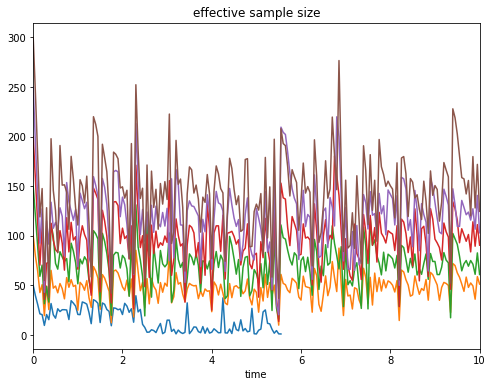

[ 50 100 150 200 250 300]
[       nan 0.16267633 0.16348328 0.16145616 0.16188702 0.16164663]
[       nan 1.51188998 1.58971376 1.81809175 1.00763647 1.59050835]


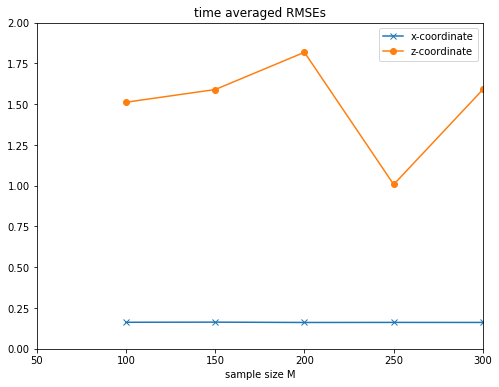

In [283]:
fig3a = plt.figure(figsize=(8,6))
plt.plot(t,effective.T)
plt.xlabel("time")
plt.title("effective sample size")
plt.xlim([0,10.])
plt.show()

fig3b = plt.figure(figsize=(8,6))
plt.plot(m,rmse_x, '-x', label="x-coordinate")
plt.plot(m,rmse_z, '-o', label="z-coordinate")
print(m)
print(rmse_x)
print(rmse_z)
plt.xlabel("sample size M")
plt.title("time averaged RMSEs")
plt.xlim([50,300])
plt.ylim([0,2.0])
plt.legend()
plt.show()